In [0]:
!wget https://data.mendeley.com/datasets/h3cgnj8hft/1/files/286768bb-83f2-4e59-9210-6fed84e3c7fd/Phishing_Legitimate_full.arff?dl=1

# FastAI

In [0]:
import fastai
from fastai import tabular as tab
from scipy.io import arff

In [0]:
path = tab.Path('./')
input_data, input_meta = arff.loadarff(path/'train_data.arff')
data_df = tab.pd.DataFrame(input_data, index=None)

In [3]:
data_df

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3.0,1.0,5.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21.0,44.0,0.0,0.0,0.0,0.0,0.000000,0.250000,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,b'1'
1,3.0,1.0,3.0,144.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,16.0,103.0,0.0,1.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,b'1'
2,3.0,1.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0,24.0,0.0,0.0,0.0,0.0,0.375000,1.000000,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,-1.0,0.0,b'1'
3,3.0,1.0,6.0,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,22.0,50.0,0.0,0.0,0.0,1.0,1.000000,0.095238,1.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,-1.0,b'1'
4,3.0,0.0,4.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,10.0,29.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,1.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,17.0,0.0,0.0,0.0,0.096774,0.757143,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,1.0,0.0,1.0,b'0'
9996,2.0,1.0,4.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,19.0,33.0,0.0,0.0,0.0,0.0,0.161290,0.275862,0.0,1.0,0.0,0.0,0.0,0.129032,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,b'0'
9997,2.0,1.0,4.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,16.0,34.0,0.0,0.0,0.0,0.0,0.070423,0.500000,0.0,1.0,0.0,0.0,0.0,0.056338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,b'0'
9998,3.0,1.0,1.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0,13.0,13.0,0.0,0.0,0.0,0.166667,0.428571,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,b'0'


In [0]:
data_df['CLASS_LABEL'] = data_df['CLASS_LABEL'].map(lambda x: int(x.decode('UTF-8')))

In [0]:
# data_df.info()

In [6]:
data_df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.00000

In [7]:
data_df.astype('object').describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000
unique,17.0,13.0,18.0,226.0,25.0,10.0,2.0,2.0,16.0,14.0,19.0,16.0,2.0,82.0,2.0,2.0,2.0,2.0,2.0,1.0,74.0,147.0,164.0,2.0,4.0,2.0,2510.0,1489.0,2.0,2.0,2.0,2.0,2.0,1311.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2
top,2.0,0.0,3.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1
freq,4053.0,4835.0,2485.0,192.0,5001.0,9066.0,9997.0,9869.0,8617.0,9727.0,8134.0,8975.0,9977.0,4266.0,9888.0,5252.0,9828.0,9778.0,5711.0,10000.0,755.0,326.0,8013.0,9991.0,9089.0,9429.0,3291.0,2330.0,8328.0,8440.0,7513.0,8982.0,9424.0,5783.0,7847.0,9945.0,9860.0,9951.0,8712.0,6604.0,9678.0,9696.0,9666.0,3465.0,6341.0,8469.0,3988.0,6094.0,5000


In [0]:
data_df = data_df.sample(frac=1.0, random_state=9999).reset_index()

In [9]:
num_cols = data_df.select_dtypes(exclude='object').columns.values
cat_cols = data_df.select_dtypes(include='object').columns.values
cat_cols = None if len(cat_cols)==0 else cat_cols
print(cat_cols, num_cols)

None ['index' 'NumDots' 'SubdomainLevel' 'PathLevel' 'UrlLength' 'NumDash' 'NumDashInHostname' 'AtSymbol' 'TildeSymbol'
 'NumUnderscore' 'NumPercent' 'NumQueryComponents' 'NumAmpersand' 'NumHash' 'NumNumericChars' 'NoHttps' 'RandomString'
 'IpAddress' 'DomainInSubdomains' 'DomainInPaths' 'HttpsInHostname' 'HostnameLength' 'PathLength' 'QueryLength'
 'DoubleSlashInPath' 'NumSensitiveWords' 'EmbeddedBrandName' 'PctExtHyperlinks' 'PctExtResourceUrls' 'ExtFavicon'
 'InsecureForms' 'RelativeFormAction' 'ExtFormAction' 'AbnormalFormAction' 'PctNullSelfRedirectHyperlinks'
 'FrequentDomainNameMismatch' 'FakeLinkInStatusBar' 'RightClickDisabled' 'PopUpWindow' 'SubmitInfoToEmail'
 'IframeOrFrame' 'MissingTitle' 'ImagesOnlyInForm' 'SubdomainLevelRT' 'UrlLengthRT' 'PctExtResourceUrlsRT'
 'AbnormalExtFormActionR' 'ExtMetaScriptLinkRT' 'PctExtNullSelfRedirectHyperlinksRT' 'CLASS_LABEL']


In [0]:
dep_var = 'CLASS_LABEL'
procs = [tab.FillMissing, tab.Categorify, tab.Normalize]

In [0]:
val_idx = list(range(9000,10000))
dataset = (tab.TabularList.from_df(data_df, cat_names=cat_cols, cont_names=num_cols, procs=procs)
                                .split_by_idx(val_idx)
                                .label_from_df(cols=dep_var)
                                .databunch())

In [12]:
dataset.show_batch(rows=5)

index,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL,target
-0.6892,-0.3356,0.5621,-0.1583,-0.8743,-0.5833,-0.2540,-0.0183,-0.1172,-0.2913,-0.1192,-0.3404,-0.2476,-0.0484,-0.6000,0.1081,-1.0473,-0.1341,-0.1472,-0.8681,0.0000,0.5152,-0.9955,-0.3526,-0.0298,-0.2973,-0.2448,-0.7037,-0.8200,2.2297,0.4313,-0.5758,-0.3374,-0.2458,-0.4347,-0.5233,-0.0725,-0.1201,-0.0717,-0.3831,-0.7152,-0.1850,-0.1775,0.1727,1.1931,0.7252,0.3969,1.0910,0.7615,0.9982,1
-1.1083,-0.3356,-0.7891,-0.1583,-0.6651,-0.5833,-0.2540,-0.0183,-0.1172,0.6143,-0.1192,-0.3404,-0.2476,-0.0484,-0.6000,0.1081,-1.0473,-0.1341,-0.1472,1.1518,0.0000,-0.4753,-0.3868,-0.3526,-0.0298,-0.2973,-0.2448,1.8038,-0.4942,2.2297,0.4313,-0.5758,-0.3374,-0.2458,-0.0906,1.9107,-0.0725,-0.1201,-0.0717,-0.3831,-0.7152,-0.1850,-0.1775,0.1727,1.1931,0.7252,0.3969,-0.2341,-1.4679,0.9982,1
0.8316,-1.0769,-0.7891,-0.1583,1.3964,-0.2609,-0.2540,-0.0183,-0.1172,0.6143,1.4423,1.1482,1.5389,-0.0484,0.4330,0.1081,-1.0473,-0.1341,-0.1472,-0.8681,0.0000,-0.3515,-0.5491,2.5507,-0.0298,-0.2973,-0.2448,-0.1186,0.9010,-0.4484,0.4313,-0.5758,-0.3374,-0.2458,-0.4347,-0.5233,-0.0725,-0.1201,-0.0717,-0.3831,1.3980,5.4035,-0.1775,0.1727,-1.2476,-0.4027,0.3969,-1.5592,0.7615,-1.0017,0
-0.0481,-0.3356,-0.7891,-0.1583,-0.8444,-0.5833,-0.2540,-0.0183,-0.1172,-0.2913,-0.1192,-0.3404,-0.2476,-0.0484,-0.6000,0.1081,-1.0473,-0.1341,-0.1472,-0.8681,0.0000,-0.8467,-0.5085,-0.3526,-0.0298,-0.2973,-0.2448,-0.7037,-1.0117,-0.4484,0.4313,-0.5758,-0.3374,-0.2458,2.7777,-0.5233,-0.0725,-0.1201,-0.0717,-0.3831,-0.7152,-0.1850,5.6324,0.1727,1.1931,0.7252,0.3969,1.0910,-1.4679,0.9982,1
0.6594,-0.3356,-0.7891,-0.1583,1.0080,4.2515,-0.2540,-0.0183,-0.1172,-0.2913,-0.1192,-0.3404,-0.2476,-0.0484,-0.0835,0.1081,0.9547,-0.1341,-0.1472,1.1518,0.0000,-1.0943,2.0885,-0.3526,-0.0298,-0.2973,-0.2448,-0.4112,-0.2086,-0.4484,-2.3180,-0.5758,-0.3374,-0.2458,-0.2741,-0.5233,-0.0725,-0.1201,-0.0717,-0.3831,1.3980,-0.1850,-0.1775,0.1727,-1.2476,0.7252,0.3969,-0.2341,0.7615,-1.0017,0


In [0]:
learner = tab.tabular_learner(dataset, layers=[100,50], metrics=tab.accuracy)

In [14]:
learner.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=50, out_features=2, bias=True)
  )
)

In [15]:
learner.summary()

TabularModel
Layer (type)         Output Shape         Param #    Trainable 
BatchNorm1d          [50]                 100        True      
______________________________________________________________________
Linear               [100]                5,100      True      
______________________________________________________________________
ReLU                 [100]                0          False     
______________________________________________________________________
BatchNorm1d          [100]                200        True      
______________________________________________________________________
Linear               [50]                 5,050      True      
______________________________________________________________________
ReLU                 [50]                 0          False     
______________________________________________________________________
BatchNorm1d          [50]                 100        True      
_________________________________________________

In [16]:
learner.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.020653,0.005951,0.999000,00:01
1,0.001432,0.000049,1.000000,00:01
2,0.000154,0.000027,1.000000,00:01


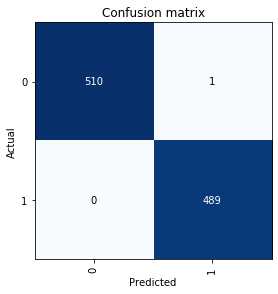

In [18]:
interp = tab.ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

# dragunov

In [20]:
# !pip install --upgrade tensorflow -q
# !python -m zipfile -e dragunov.zip .
# %cd dragunov
# !pip install -e . -q
# %cd ..
# !rm dragunov.zip

/content/dragunov
/content


In [19]:
import tensorflow as tf
from tensorflow import keras

from dragunov.models import nn
from dragunov.utils import utils

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

tf.__version__

'2.0.0'

In [20]:
data_df.shape

(10000, 50)

In [30]:
def get_model(seed=2019):
    tf.random.set_seed(seed)

    model = keras.models.Sequential([
        keras.layers.Input((50,)),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(100, 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(50, 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, 'sigmoid')
    ])

    loss = keras.losses.BinaryCrossentropy() # keras.losses.SparseCategoricalCrossentropy()
    optimizer = keras.optimizers.Adam(lr=1e-2, beta_1=0.9, beta_2=0.99)
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

    return model

model = get_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 50)                200       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_5 (Batch (None, 50)                200       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 11,001
Trainable params: 10,601
Non-trainable params: 400
________________________________________________

In [0]:
def cat_encode(X):
    raw_vals = X.unique()
    val_map = {raw_vals[i] : i for i in range(len(raw_vals))}
    vals = X.map(val_map).values
    return vals

class PreProcess(utils.ReadyInputs):
    def pre_process(self, X):
        X_list = []

        # Continuous data 
        num_df = X.select_dtypes(exclude='object')
        vals = num_df.values
        X_list.append(vals)

        # Return
        return X_list

In [0]:
train_df = data_df.iloc[:-1000, :]
train_df.reset_index(inplace=True)

test_df = data_df.iloc[-1000:, :-1]
test_df.reset_index(inplace=True)

In [0]:
split_features = PreProcess()
net = nn.NN(model, train_df, test_df, split_features, target_name=dep_var, n_fold=4, n_run_per_fold=1)

In [34]:
y_pred_df = net.kfold_fit(epochs=3, batch_size=64)


Fold 1:
Train on 10132 samples, validate on 2251 samples
Epoch 1/3
10132/10132 [==============================] - 2s 154us/sample - loss: 0.0500 - accuracy: 0.9813 - val_loss: 0.0401 - val_accuracy: 0.9871
Epoch 2/3
10132/10132 [==============================] - 1s 49us/sample - loss: 0.0284 - accuracy: 0.9890 - val_loss: 0.0187 - val_accuracy: 0.9942
Epoch 3/3
10132/10132 [==============================] - 1s 51us/sample - loss: 0.0224 - accuracy: 0.9924 - val_loss: 0.0103 - val_accuracy: 0.9964

Fold 2:
Train on 10133 samples, validate on 2250 samples
Epoch 1/3
10133/10133 [==============================] - 1s 51us/sample - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0231 - val_accuracy: 0.9907
Epoch 2/3
10133/10133 [==============================] - 1s 51us/sample - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 3/3
10133/10133 [==============================] - 1s 52us/sample - loss: 0.0170 - accuracy: 0.9935 - val_loss: 0.0110 - val_accuracy: 0.

In [35]:
y_test = data_df.iloc[-1000:, -1].values
y_test

array([0, 1, 0, 0, ..., 0, 0, 0, 0])

In [0]:
from sklearn.metrics import confusion_matrix as cm

In [37]:
y_pred = y_pred_df.apply(lambda x: x > 0.5)
y_pred = y_pred.astype(int).values.squeeze()
y_pred

array([0, 1, 0, 0, ..., 0, 0, 0, 0])

In [38]:
cm(y_test, y_pred)

array([[508,   3],
       [  0, 489]])